University of Zagreb, Faculty of Electrical Engineering and Computing

# Introduction to Data Science Course Project
## Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms

#### Fani Sentinella-Jerbić, Matej Čubek, Leon Novački, Fran Hrabar, 2021

---

This project's aim was to replicate and creatively expand a data science themed scientific article using a Jupyter notebook. We replicated the following article:

S. Ara, A. Das and A. Dey, _Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms_, 2021 International Conference on Artificial Intelligence (ICAI), 2021, pp. 97-101, doi: 10.1109/ICAI52203.2021.9445249.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections

plt.style.use('seaborn')

### About the replicated article


#### Research type classification:
- according to purpose: **applied** - uses known methods on new problems, doesn't answer any general questions in the field of artificial science nor does it introduce any new methods
- according to information origin: **secondary** - uses dataset provided by another institution
- according to time: **cross-sectional study** - made from an existing dataset during the International Conference on Artificial Intelligence in Islamabad
- according to method of gathering: **documentary** - uses existing data for the analysis, doesn't collect any new data
- according to data type: **quantitative** - all features have numerical values which are then used to compute the predictions
- according to degree of manipulation: **observational** - the data was collected from real patients already having the breast cancer
- according to depth of conclusion: **correlational** - tries to determine a model which predicts if a person has benign or malignant breast cancer based on the collected features
- according to type of conclusion: **deductive** - some things can be predicted by ML algorithms and that is what the authors of this article tried to do for breast cancer classification


#### Method of information retrieval:

Authors used an existing dataset provided by the University of Wisconsin Hospitals and donated by Nick Street in November 1995.


#### Research ethics:

The article was made and published as a part of the International Conference on Artificial Intelligence in Islamabad which is under sponsorship of IEEE. This leads us to believe it is published legally and with a certain level of academic dignity. The research did not include dealing with patients since they used a pre-existing dataset, so we believe they caused minimum risk of harm to society.

However, the article contains some logical issues in interpreting graphical data (described further in this notebook) so one could argue that the academic dignity of the article is questionable. This is not unusual for an article written at a conference since the time spent on the article is limited. Furthermore, the article could have given more academic credit to the authors of the dataset which wanted certain information to be provided when the dataset is used in research (can be seen at the end of this notebook). 

### Descriptive analysis
The dataset used is a special dataset called "Wisconsin Diagnostic Breast Cancer (WDBC)". It consists of 357 benign and 212 malignant cancer samples, as seen in the barchart below. 

In [ ]:
from sklearn import datasets

data = datasets.load_breast_cancer()

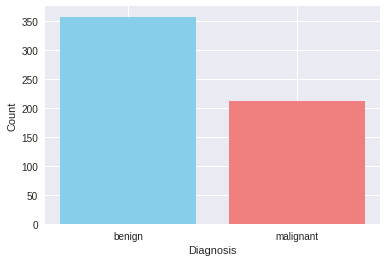

In [ ]:
cnt = np.bincount(data.target)
plt.bar(data.target_names[::-1], cnt[::-1], color=['skyblue', 'lightcoral'])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

It contains calculated measures such as **mean**, **standard error** and **the worst (largest) value** of 30 different parameters determined by microscopic analysis on the breast tissue. The tissue is collected from a patient through *Fine Needle Aspiration* biopsy procedure. 

In [ ]:
# original samples
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Below we can see the counterplot of the mean radius shown in the replicated article:

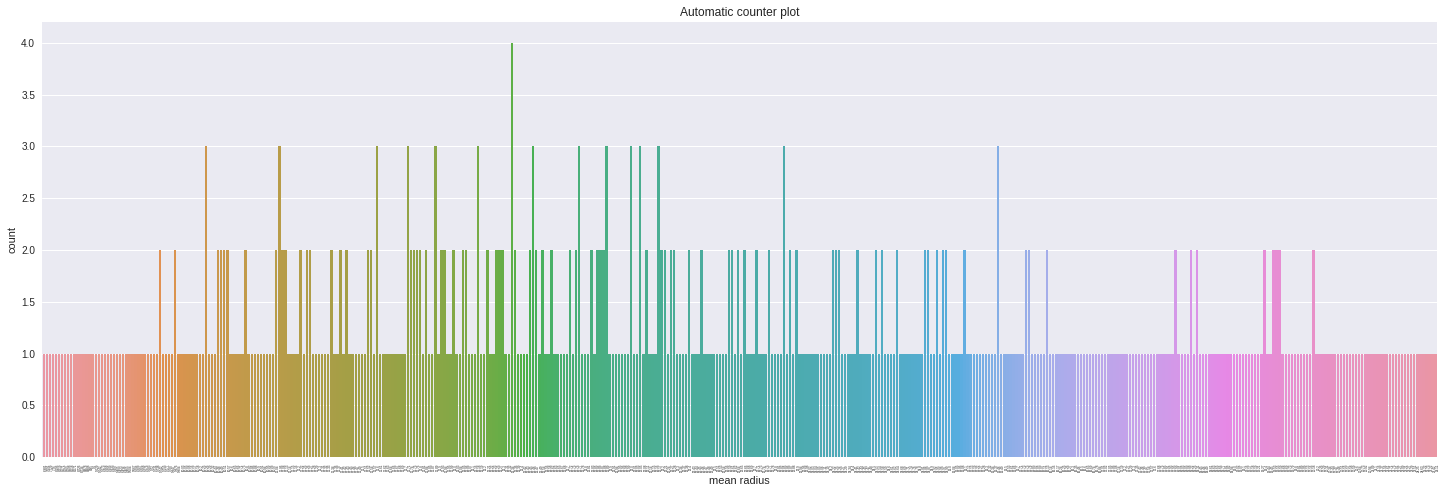

In [ ]:
plt.figure(figsize=(25, 8))
ax = sns.countplot(x=X['mean radius'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left", fontsize=3)
plt.title('Automatic counter plot')
plt.show()

As the x-axis values are not recognizable, we have plotted a different graph to better represent the information in the graph:

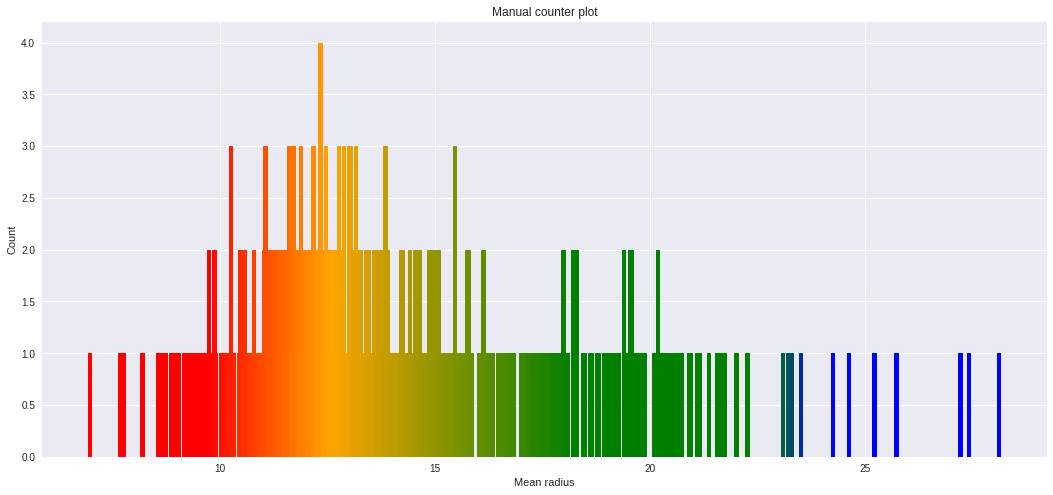

In [ ]:
import matplotlib.colors as mcolors

w = collections.Counter(X['mean radius'])

clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"),
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
plt.figure(figsize=(18, 8))
xp = np.array(list(w.keys())).astype(float)
yp = np.array(list(w.values())).astype(float)
plt.bar(xp, yp, color=rvb(20 * xp / len(xp) - 0.3), width=0.1)
plt.title('Manual counter plot')
plt.xlabel('Mean radius')
plt.ylabel('Count')
plt.show()

The authors of the scientific paper have determined the following from the counter graph: *it can be observed that suspected patients not bearing cancer have a mean radius of around 1, whereas suspected patients bearing cancer have a 
mean radius of more than 1*, however we believe  the authors have made a mistake. The graph doesn't show the radius being around 1 for any of the patients. In fact, the smallest radius mean in the dataset is 6.981 and the mean of all radius means is 14.127292 (calculated in the previous section), which is far from 1. 

The proof of this can also be seen in the histogram below.

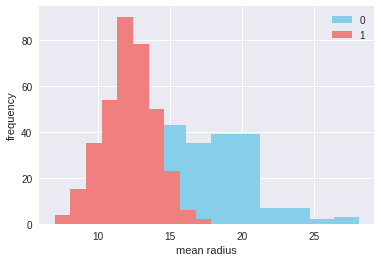

In [ ]:
D = pd.DataFrame(X.copy())
D.insert(0, 'diagnosis', data.target)

D['mean radius'][D['diagnosis'] == 0].hist(color='skyblue', label='0')
D['mean radius'][D['diagnosis'] == 1].hist(color='lightcoral', label='1')
plt.xlabel('mean radius')
plt.ylabel('frequency')
plt.legend()
plt.show()

### Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

D_train = pd.DataFrame(X_train.copy())
D_train.insert(0, 'diagnosis', y_train)

### Feature selection
For feature selecton we started with comparing all features present in the dataset. Using a heatmap, correlations between all the available features are graphicaly shown. The correlation value is in range [0,1] where 1 presents perfect correlation and 0 presents no correlation whatsoever. For correlation calculation we used the Phi coefficient also known as the Matthews correlation coefficient.

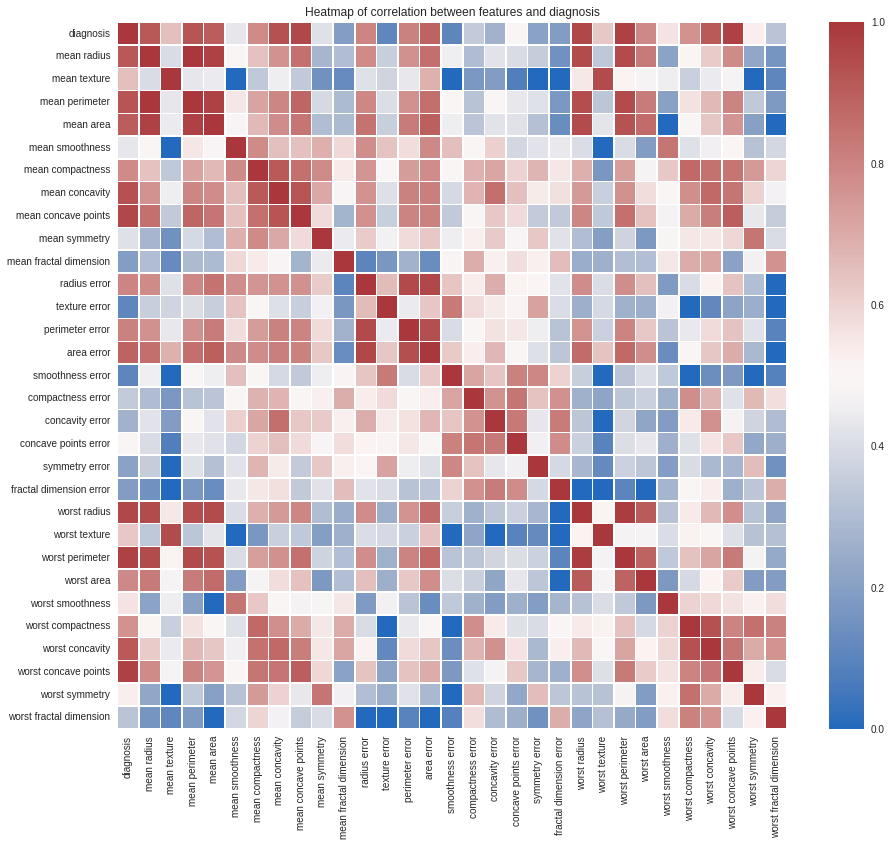

In [ ]:
!pip install phik
import phik

D_train = pd.DataFrame(X_train.copy())
D_train.insert(0, 'diagnosis', y_train)

#cor_matrix = D_train.corr()
cor_matrix_with_target = D_train.phik_matrix(interval_cols=D_train.columns)
cor_matrix_without_target = X_train.phik_matrix(interval_cols=X_train.columns)

plt.figure(figsize=(15, 13))
sns.heatmap(cor_matrix_with_target, cmap="vlag", linewidths=.5)  #, mask=np.triu(D_train_mean.corr()))
plt.title("Heatmap of correlation between features and diagnosis")
plt.show()

From the heatmap we can note that there are many features that are higly correlated with each other. Those features can negatively impact our ML models, so we had to remove them from the dataset before we started training our models. 

We did so by using the correlation matrix and searching for pairs with a correlation greater than 0.99. That specififc number showed the best results on our dataset alongside the chosen feature selection algorithm. From each of those pairs one feature was removed. Features marked as redundant because of correlation with others are printed below.

In [ ]:
drop_cutoff = 0.99

upper_tri = cor_matrix_without_target.abs().where(
    np.triu(np.ones(cor_matrix_without_target.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > float(drop_cutoff))]

print(list(to_drop))

['mean perimeter']


In [ ]:
X_train = X_train.drop(list(to_drop), axis=1)
X_test = X_test.drop(list(to_drop), axis=1)
D_train = D_train.drop(list(to_drop), axis=1)

X_train.shape

(426, 29)

Next, we considered the correlation of the remaining features with the target feature. For this we used the Phi coefficient once again. From the barplot we can note which features are the most interesting for us to train our models on.


<Figure size 720x360 with 0 Axes>

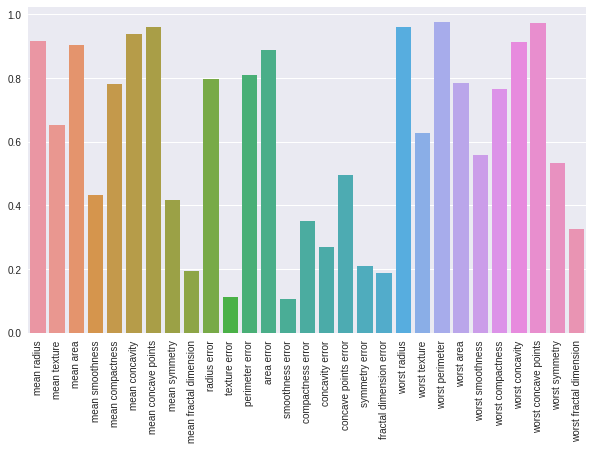

In [ ]:
plt.figure(figsize=(10, 5))

corr_with_target = D_train.phik_matrix(interval_cols=X_train.columns)['diagnosis'].drop(labels=['diagnosis'])

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.show()

Finally, we used a feature selection algorithm to select a subset of the remaining features in the dataset. We selected features which can impact our models positively and dropped the rest as that yielded the best results.

The method we used for feature selection is Sequential Feature Selector. It is a greedy algorithm that selects the best subset of features by going forward based on a cross validation score of an estimator. It starts with zero features and then finds a feature that maximizes the cross-validated score on the selected feature. Then the process is repeated by adding another feature until the point that the desired number is reached. We used the logistic regression algorithm as an estimator for this feature selection method.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

num_features = 6

X_best = SequentialFeatureSelector(estimator=LogisticRegression(max_iter=500), n_features_to_select=num_features, cv=10,
                                   direction='forward', n_jobs=4).fit(X_train, y_train)
mask = X_best.get_support()
best_features = []
for curr_bool, feature in zip(mask, X_train.columns):
    if curr_bool:
        best_features.append(feature)

print(f"Best features are: {best_features}")

Best features are: ['mean radius', 'mean smoothness', 'mean compactness', 'mean concavity', 'worst texture', 'worst perimeter']


In [ ]:
X_train = X_train[X_train.columns[X_best.get_support(indices=True)]]
X_test = X_test[X_test.columns[X_best.get_support(indices=True)]]

X_train.shape

(426, 6)

--- 

### Training and testing

Some algorithms perform better when the data is scaled so that is what we did here. Authors of the replicated article mention using scaling as well.

In [ ]:
from sklearn.preprocessing import StandardScaler

sclr = StandardScaler()
X_train_s = sclr.fit_transform(X_train)
X_test_s = sclr.fit_transform(X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

results = pd.DataFrame(
    columns=['Algorithms', 'Training Accuracy', 'Testing Accuracy', 'Testing Recall', 'Testing F1 Score',
             'Testing AUC'])


def get_false_negatives(model, X_test, y_test, mod=None):
    if mod is not None:
        predicted_test = model.predict(mod.fit_transform(X_test))
    else:
        predicted_test = model.predict(X_test)

    indexes = []
    for x in range(0, len(predicted_test)):
        if predicted_test[x] == 1 and y_test[x] == 0:
            indexes.append(x)
    samples = []
    for index in indexes:
        samples.append(X_test.iloc[index])
    return samples


def test_model(model, model_label, X_train, y_train, X_test, y_test, mod=None, print_bool=True):
    if mod is not None:
        predicted_train = model.predict(mod.fit_transform(X_train))
        predicted_test = model.predict(mod.fit_transform(X_test))
    else:
        predicted_train = model.predict(X_train)
        predicted_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, predicted_train)
    test_accuracy = accuracy_score(y_test, predicted_test)
    test_recall = recall_score(y_test, predicted_test)
    test_f1_score = f1_score(y_test, predicted_test)
    test_auc = roc_auc_score(y_test, predicted_test)

    if print_bool:
        print(f'Algorithm: {model_label}')
        print(f'Training accuracy: {train_accuracy}\nTesting accuracy: {test_accuracy}')
        print(f'Test recall: {test_recall}\nTesting F1 Score: {test_f1_score}\nTesting AUC: {test_auc}\n')

    return {'Algorithms': model_label, 'Training Accuracy': train_accuracy,
            'Testing Accuracy': test_accuracy,
            'Testing Recall': test_recall,
            'Testing F1 Score': test_f1_score,
            'Testing AUC': test_auc}


def draw_confusion_matrix(model, graph_label, X_dataset, y_dataset, mod=None):
    if mod is None:
        y_generated = model.predict(X_dataset)
    else:
        y_generated = model.predict(mod.fit_transform(X_dataset))

    cf_matrix = confusion_matrix(y_dataset, y_generated)

    cbar_kws = {
        "ticks": np.array([15, 30, 45, 60, 75]),
    }

    sns.heatmap(cf_matrix, annot=True, cmap='Blues', linewidths=5, cbar_kws=cbar_kws)
    plt.title(graph_label)


def grid_search(model, hyperparams, X_dataset, y_dataset, mod=None, metric='f1', print_bool=True):
    search = GridSearchCV(model, hyperparams, scoring=metric, n_jobs=-1, verbose=0)

    if mod is not None:
        result = search.fit(mod.fit_transform(X_dataset), y_dataset)
    else:
        result = search.fit(X_dataset, y_dataset)

    if print_bool:
        print('Best hyperparameters: ' + str(result.best_params_))
    return result.best_estimator_

To evaluate performance of each algorithm, we used accuracy, F1 score, Recall and AUC. We decided the F1 score is better for our dataset than accuracy (which was used in the replicated article) since there is an imbalance of class distribution and the false negatives are crucial (as explained further through this notebook). Because of this, when we performed grid search, we chose the hyperparameters which yield the best results for F1 score.

#### Logistic regression


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings


def grid_search_LogisticRegression(X_train, y_train, X_test, y_test, results, print_bool=True):
    hyperparams = {
        'solver': ['liblinear', 'newton-cg', 'lbfgs'],
        'penalty': ['none', 'l1', 'l2', 'elasticnet'],
        'C': [0.1, 1, 10, 100],
    }

    with warnings.catch_warnings(record=True):
        clf_lr = grid_search(LogisticRegression(), hyperparams, X_train, y_train, sclr, print_bool=print_bool)

    results = results.append(
        test_model(clf_lr, 'Logistic regression', X_train, y_train, X_test, y_test, sclr, print_bool=print_bool),
        ignore_index=True)
    fn = get_false_negatives(clf_lr, X_test, y_test, sclr)

    return clf_lr, results, fn


clf_lr, results, logreg_fn = grid_search_LogisticRegression(X_train, y_train, X_test, y_test, results)

Best hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Algorithm: Logistic regression
Training accuracy: 0.9694835680751174
Testing accuracy: 0.972027972027972
Test recall: 0.9886363636363636
Testing F1 Score: 0.9775280898876404
Testing AUC: 0.9670454545454545



#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC


def grid_search_SVM(X_train, y_train, X_test, y_test, results, print_bool=True):
    hyperparams = {
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': [1, 0.1, 0.01, 0.001],
        'C': [0.1, 1, 10, 100],
    }

    clf_svm = grid_search(SVC(), hyperparams, X_train, y_train, sclr, print_bool=print_bool)

    results = results.append(
        test_model(clf_svm, 'Support Vector Machine', X_train, y_train, X_test, y_test, sclr, print_bool=print_bool),
        ignore_index=True)
    fn = get_false_negatives(clf_svm, X_test, y_test, sclr)

    return clf_svm, results, fn


clf_svm, results, svm_fn = grid_search_SVM(X_train, y_train, X_test, y_test, results)

Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Algorithm: Support Vector Machine
Training accuracy: 0.9741784037558685
Testing accuracy: 0.9790209790209791
Test recall: 1.0
Testing F1 Score: 0.9832402234636871
Testing AUC: 0.9727272727272727



#### K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


def grid_search_kNN(X_train, y_train, X_test, y_test, results, print_bool=True):
    hyperparams = {
        'n_neighbors': list(range(1, 15)),
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'manhattan']
    }

    clf_knn = grid_search(KNeighborsClassifier(), hyperparams, X_train, y_train, sclr, print_bool=print_bool)

    results = results.append(test_model(clf_knn, 'KNN', X_train, y_train, X_test, y_test, sclr, print_bool=print_bool),
                             ignore_index=True)
    fn = get_false_negatives(clf_knn, X_test, y_test, sclr)

    return clf_knn, results, fn


clf_knn, results, knn_fn = grid_search_kNN(X_train, y_train, X_test, y_test, results)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Algorithm: KNN
Training accuracy: 0.9694835680751174
Testing accuracy: 0.9790209790209791
Test recall: 1.0
Testing F1 Score: 0.9832402234636871
Testing AUC: 0.9727272727272727



#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


def grid_search_DecisionTree(X_train, y_train, X_test, y_test, results, seed, print_bool=True):
    hyperparams = {
        'ccp_alpha': [0.1, 0.01, 0.001, 0.0001, 0],
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 6, 7, 8, 9, 10, None],
        'max_features': ['auto', 'sqrt', 'log2']
    }

    clf_dt = grid_search(DecisionTreeClassifier(random_state=seed), hyperparams, X_train, y_train,
                         print_bool=print_bool)

    results = results.append(
        test_model(clf_dt, 'Decision Tree', X_train, y_train, X_test, y_test, print_bool=print_bool), ignore_index=True)
    fn = get_false_negatives(clf_dt, X_test, y_test)

    return clf_dt, results, fn


clf_dt, results, dt_fn = grid_search_DecisionTree(X_train, y_train, X_test, y_test, results, seed=5)

Best hyperparameters: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}
Algorithm: Decision Tree
Training accuracy: 0.9976525821596244
Testing accuracy: 0.9440559440559441
Test recall: 0.9431818181818182
Testing F1 Score: 0.9540229885057472
Testing AUC: 0.9443181818181818



#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


def grid_search_NaiveBayes(X_train, y_train, X_test, y_test, results, print_bool=True):
    clf_nb = GaussianNB()
    clf_nb.fit(X_train, y_train)

    results = results.append(test_model(clf_nb, 'Naive Bayes', X_train, y_train, X_test, y_test, print_bool=print_bool),
                             ignore_index=True)
    fn = get_false_negatives(clf_nb, X_test, y_test)

    return clf_nb, results, fn


clf_nb, results, nb_fn = grid_search_NaiveBayes(X_train, y_train, X_test, y_test, results)

Algorithm: Naive Bayes
Training accuracy: 0.9295774647887324
Testing accuracy: 0.951048951048951
Test recall: 0.9545454545454546
Testing F1 Score: 0.96
Testing AUC: 0.95



#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


def grid_search_RandomForest(X_train, y_train, X_test, y_test, results, seed, print_bool=True):
    hyperparams = {
        'n_estimators': [50, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [4, 6, 8, None],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 4, 6]
    }

    clf_rf = grid_search(RandomForestClassifier(random_state=seed), hyperparams, X_train, y_train,
                         print_bool=print_bool)

    results = results.append(
        test_model(clf_rf, 'Random Forest', X_train, y_train, X_test, y_test, print_bool=print_bool), ignore_index=True)
    fn = get_false_negatives(clf_rf, X_test, y_test)

    return clf_rf, results, fn


clf_rf, results, rf_fn = grid_search_RandomForest(X_train, y_train, X_test, y_test, results, seed=5)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}
Algorithm: Random Forest
Training accuracy: 1.0
Testing accuracy: 0.972027972027972
Test recall: 0.9886363636363636
Testing F1 Score: 0.9775280898876404
Testing AUC: 0.9670454545454545



#### XGBoost

In [ ]:
import xgboost as xgb


def grid_search_XGBoost(X_train, y_train, X_test, y_test, results, print_bool=True):
    hyperparams = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7, 0.9],
        'colsample_bytree': [0.5, 0.7, 0.9],
        'n_estimators': [100, 200, 500],
        'eval_metric': ['logloss']
    }

    clf_xgb = grid_search(xgb.XGBClassifier(use_label_encoder=False), hyperparams, X_train, y_train,
                          print_bool=print_bool)

    results = results.append(test_model(clf_xgb, 'XGB', X_train, y_train, X_test, y_test, print_bool=print_bool),
                             ignore_index=True)
    fn = get_false_negatives(clf_xgb, X_test, y_test)

    return clf_xgb, results, fn


clf_xgb, results, xgb_fn = grid_search_XGBoost(X_train, y_train, X_test, y_test, results)

Best hyperparameters: {'colsample_bytree': 0.5, 'eval_metric': 'logloss', 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.9}
Algorithm: XGB
Training accuracy: 0.9882629107981221
Testing accuracy: 0.972027972027972
Test recall: 0.9886363636363636
Testing F1 Score: 0.9775280898876404
Testing AUC: 0.9670454545454545



#### Multilayer perceptron

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adagrad
import numpy as np
import sklearn


def MLP(X_train, y_train, X_test, y_test, results, print_bool=True):
    model = tf.keras.Sequential()

    #input
    model.add(tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],)))
    model.add(Activation("relu"))

    #hidden
    model.add(tf.keras.layers.Dense(32))
    model.add(Activation("relu"))
    model.add(tf.keras.layers.Dense(32))
    model.add(Activation("relu"))

    #output
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    INIT_LR = 0.5
    NUM_EPOCHS = 1000
    BS = 128
    opt = Adagrad(learning_rate=INIT_LR, decay=INIT_LR / NUM_EPOCHS)
    model.compile(loss="binary_crossentropy", optimizer="adam",
                  metrics=["accuracy"])

    H = model.fit(
        x=X_train,
        y=y_train,
        batch_size=BS,
        #steps_per_epoch=X_train.shape[0] // BS,
        epochs=NUM_EPOCHS,
        verbose=0)

    predicted_train = np.multiply(model.predict(X_train) > 0.5, 1).flatten()
    predicted_test = np.multiply(model.predict(X_test) > 0.5, 1).flatten()

    train_accuracy = accuracy_score(y_train, predicted_train)
    test_accuracy = accuracy_score(y_test, predicted_test)
    test_recall = recall_score(y_test, predicted_test)
    test_f1_score = f1_score(y_test, predicted_test)
    test_auc = roc_auc_score(y_test, predicted_test)

    if print_bool:
        print('Algorithm: Multilayer perceptron')
        print(f'Training accuracy: {train_accuracy}\nTesting accuracy: {test_accuracy}')
        print(f'Test recall: {test_recall}\nTesting F1 Score: {test_f1_score}\nTesting AUC: {test_auc}\n')

    results = results.append({'Algorithms': "Multilayer Perceptron", 'Training Accuracy': train_accuracy,
                              'Testing Accuracy': test_accuracy,
                              'Testing Recall': test_recall,
                              'Testing F1 Score': test_f1_score,
                              'Testing AUC': test_auc}, ignore_index=True)

    return model, results


clf_mlp, results = MLP(X_train, y_train, X_test, y_test, results)

Algorithm: Multilayer perceptron
Training accuracy: 0.9553990610328639
Testing accuracy: 0.972027972027972
Test recall: 0.9772727272727273
Testing F1 Score: 0.9772727272727273
Testing AUC: 0.9704545454545455



#### ExtraTreesClassifier


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


def grid_search_ExtraTrees(X_train, y_train, X_test, y_test, results, seed, print_bool=True):
    hyperparams = {
        'n_estimators': [50, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [4, 6, 8, None],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 4, 6]
    }

    clf_etc = grid_search(ExtraTreesClassifier(random_state=seed), hyperparams, X_train, y_train, print_bool=print_bool)

    results = results.append(
        test_model(clf_etc, 'Extra Trees', X_train, y_train, X_test, y_test, print_bool=print_bool),
        ignore_index=True)
    fn = get_false_negatives(clf_etc, X_test, y_test)

    return clf_etc, results, fn


clf_etc, results, etc_fn = grid_search_ExtraTrees(X_train, y_train, X_test, y_test, results, seed=5)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 200}
Algorithm: Extra Trees
Training accuracy: 1.0
Testing accuracy: 0.9790209790209791
Test recall: 1.0
Testing F1 Score: 0.9832402234636871
Testing AUC: 0.9727272727272727



---

###  Analysis of Training Results

In [ ]:
results

,Algorithms,Training Accuracy,Testing Accuracy,Testing Recall,Testing F1 Score,Testing AUC
0,Logistic regression,0.969484,0.972028,0.988636,0.977528,0.967045
1,Support Vector Machine,0.974178,0.979021,1.000000,0.983240,0.972727
2,KNN,0.969484,0.979021,1.000000,0.983240,0.972727
3,Decision Tree,0.997653,0.944056,0.943182,0.954023,0.944318
4,Naive Bayes,0.929577,0.951049,0.954545,0.960000,0.950000
5,Random Forest,1.000000,0.972028,0.988636,0.977528,0.967045
6,XGB,0.988263,0.972028,0.988636,0.977528,0.967045
7,Multilayer Perceptron,0.955399,0.972028,0.977273,0.977273,0.970455
8,Extra Trees,1.000000,0.979021,1.000000,0.983240,0.972727


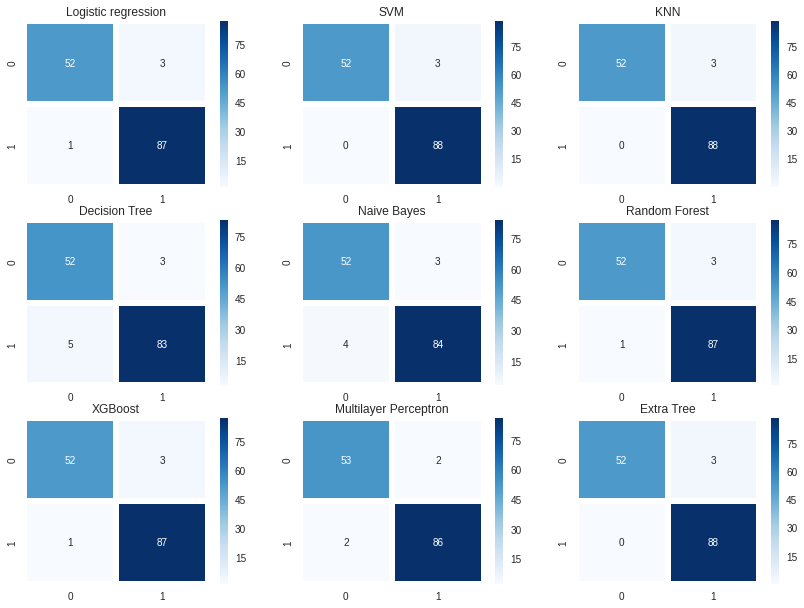

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(14, 14))

plt.subplot(4, 3, 1)
draw_confusion_matrix(clf_lr, 'Logistic regression', X_test, y_test, sclr)
plt.subplot(4, 3, 2)
draw_confusion_matrix(clf_svm, 'SVM', X_test, y_test, sclr)
plt.subplot(4, 3, 3)
draw_confusion_matrix(clf_knn, 'KNN', X_test, y_test, sclr)
plt.subplot(4, 3, 4)
draw_confusion_matrix(clf_dt, 'Decision Tree', X_test, y_test)
plt.subplot(4, 3, 5)
draw_confusion_matrix(clf_nb, 'Naive Bayes', X_test, y_test)
plt.subplot(4, 3, 6)
draw_confusion_matrix(clf_rf, 'Random Forest', X_test, y_test)
plt.subplot(4, 3, 7)
draw_confusion_matrix(clf_xgb, 'XGBoost', X_test, y_test)
plt.subplot(4, 3, 8)

##MLP
y_preds = np.multiply(clf_mlp.predict(X_test) > 0.5, 1).flatten()
cf_matrix = confusion_matrix(y_test, y_preds)
cbar_kws = {
    "ticks": np.array([15, 30, 45, 60, 75]),
}
sns.heatmap(cf_matrix, annot=True, cmap='Blues', linewidths=5, cbar_kws=cbar_kws)

plt.title("Multilayer Perceptron")
plt.subplot(4, 3, 9)
draw_confusion_matrix(clf_etc, 'Extra Tree', X_test, y_test, None)

False positives in the case of cancer classification aren't nearly as dangerous as false negatives, because additional tests are usually done on patients before starting any treatments which for cancer usually come with significant health risks.
However, false negative classifications are potentially very dangerous because they could delay further breast cancer tests being done on the patient, allowing the cancer to further grow and become harder to treat.
The confusion matrices show us that all models have a negative false rate of 7.27% or bigger.


#### Considering Multiple-Model for Classification
If multiple trained models gave different classifications for the same samples, we can consider making a model which would combine the output of all models to get a better prediction and hopefully eliminate false negatives.

In [ ]:
false_negatives = {'logreg': logreg_fn, 'svm': svm_fn, 'knn': knn_fn, 'dt': dt_fn, 'nb': nb_fn, 'rf': rf_fn,
                   'xgb': xgb_fn, 'etc': etc_fn}

for algorithm in false_negatives:
    samples = []
    for sample in false_negatives[algorithm]:
        samples.append(sample.name)
    print(f'False negatives of algorithm {algorithm}: {samples}')

False negatives of algorithm logreg: [40, 297, 197]
False negatives of algorithm svm: [40, 297, 197]
False negatives of algorithm knn: [40, 297, 414]
False negatives of algorithm dt: [40, 297, 414]
False negatives of algorithm nb: [40, 297, 414]
False negatives of algorithm rf: [40, 297, 414]
False negatives of algorithm xgb: [40, 297, 414]
False negatives of algorithm etc: [40, 297, 414]


We can see that all algorithms failed to classify the same samples (in this split, its samples 40, 99, and 297). If different algorithms had had different false negatives and false positives, we would have constructed a model which would pick a classification by considering the classifications made by each algorithm individually. This was not the case. 

Considering there are multiple kinds of breast cancer, maybe these particular samples were of the more rare kind of breast cancer resulting in wrong classification. Or there might have been some other underlying pattern which we couldn't recognize with our models.

### Evaluation 

After training of our models was finished, we became curious about how much impact the randomness of the data split had on the performance of our models. To find out, we ran everything again through 30 different random states and watched how the performance measures of each algorithm fared.

In [ ]:
'''
all_iterations
  |_seed
    |_dropped_highly_correlated_features
    |_features
    |_results
    |_models
      |_LogReg
      |_SVM
      |_kNN
      |_DT
      |_NB
      |_RF
      |_XGB
      |_MLP
      |_ETC
'''
all_iterations = {}

seed_range = range(30)

for seed in seed_range:
    print("SEED " + str(seed))
    current_seed_iteration = {}

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

    # Feature selection
    cor_matrix_without_target = X_train.phik_matrix(interval_cols=X_train.columns)

    # Drop highly correlated featyres
    upper_tri = cor_matrix_without_target.abs().where(
        np.triu(np.ones(cor_matrix_without_target.shape), k=1).astype(np.bool_))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > float(drop_cutoff))]

    X_train = X_train.drop(list(to_drop), axis=1)
    X_test = X_test.drop(list(to_drop), axis=1)

    current_seed_iteration["dropped_highly_correlated_features"] = to_drop

    # Feature selection SequentialFeature
    X_best = SequentialFeatureSelector(estimator=LogisticRegression(max_iter=500), n_features_to_select=num_features,
                                       cv=10,
                                       direction='forward', n_jobs=4).fit(X_train, y_train)
    mask = X_best.get_support()
    best_features = []
    for curr_bool, feature in zip(mask, X_train.columns):
        if curr_bool:
            best_features.append(feature)

    # Use best fetures obtained from SequentialFeatureSelector
    X_train = X_train[X_train.columns[X_best.get_support(indices=True)]]
    X_test = X_test[X_test.columns[X_best.get_support(indices=True)]]

    current_seed_iteration["features"] = best_features

    # Training and testing
    results = pd.DataFrame(
        columns=['Algorithms', 'Training Accuracy', 'Testing Accuracy', 'Testing Recall', 'Testing F1 Score',
                 'Testing AUC'])

    models = {}
    # Logistic Regression
    clf_lr, results, non = grid_search_LogisticRegression(X_train, y_train, X_test, y_test, results, print_bool=False)
    models["LogReg"] = clf_lr
    # Support Vector Machine
    clf_svm, results, __ = grid_search_SVM(X_train, y_train, X_test, y_test, results, print_bool=False)
    models["SVM"] = clf_svm
    # K-Nearest Neighbour
    clf_knn, results, __ = grid_search_kNN(X_train, y_train, X_test, y_test, results, print_bool=False)
    models["kNN"] = clf_knn
    # Decision Tree
    clf_dt, results, __ = grid_search_DecisionTree(X_train, y_train, X_test, y_test, results, seed, print_bool=False)
    models["DT"] = clf_dt
    # Naive Bayes
    clf_nb, results, __ = grid_search_NaiveBayes(X_train, y_train, X_test, y_test, results, print_bool=False)
    models["NB"] = clf_nb
    # Random Forest
    clf_rf, results, __ = grid_search_RandomForest(X_train, y_train, X_test, y_test, results, seed, print_bool=False)
    models["RF"] = clf_rf
    # XGBoost
    clf_xgb, results, __ = grid_search_XGBoost(X_train, y_train, X_test, y_test, results, print_bool=False)
    models["XGB"] = clf_xgb
    # Multilayer Perceptron
    clf_mlp, results = MLP(X_train, y_train, X_test, y_test, results, print_bool=False)
    models["mlp"] = clf_mlp
    # ExtraTreesClassifier
    clf_etc, results, __ = grid_search_ExtraTrees(X_train, y_train, X_test, y_test, results, seed, print_bool=False)
    models["ETC"] = clf_etc

    current_seed_iteration["models"] = models
    current_seed_iteration["results"] = results

    all_iterations[seed] = current_seed_iteration

SEED 0
SEED 1
SEED 2
SEED 3
SEED 4
SEED 5
SEED 6
SEED 7
SEED 8
SEED 9
SEED 10
SEED 11
SEED 12
SEED 13
SEED 14
SEED 15
SEED 16
SEED 17
SEED 18
SEED 19
SEED 20
SEED 21
SEED 22
SEED 23
SEED 24
SEED 25
SEED 26
SEED 27
SEED 28
SEED 29


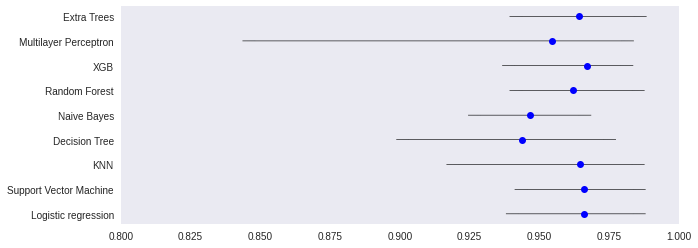

In [ ]:
'''
model_summary
        |_model
          |_worst
          |_median
          |_best
'''
model_summary = {}
model_names = list(all_iterations[list(seed_range)[0]]["results"]["Algorithms"])
for model_name in model_names:
    model_scores = []
    for seed in seed_range:
        model_results = all_iterations[seed]["results"]
        model_score = float(model_results[model_results['Algorithms'] == model_name]["Testing F1 Score"])
        model_scores.append(model_score)

    model_summary[model_name] = {
        "worst": np.min(model_scores),
        "median": np.median(model_scores),
        "best": np.max(model_scores)
    }

#print(model_accs)
fig, ax = plt.subplots(figsize=(10, 4))

for i, model_name in enumerate(model_names):
    ax.arrow(model_summary[model_name]["median"], i,
             model_summary[model_name]["worst"] - model_summary[model_name]["median"], 0)
    ax.arrow(model_summary[model_name]["median"], i,
             model_summary[model_name]["best"] - model_summary[model_name]["median"], 0)
    plt.plot(model_summary[model_name]["median"], i, 'bo')

    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)
    ax.set_xlim(0.8, 1)
    ax.grid()

plt.show()

Result of the evaluation can be seen in the plot above. Lines represent ranges of the F1 score for each algorithm, while dots represent median values. 

We can see that most of the algorithms achieved similar F1 score and range. However, Multilayer Perceptron, Naive Bayes and Decision Tree seem to have performed the worst, either in terms of F1 score or the range. We wouldn't recommend using them for the classification of the breast cancer. Out of the well performing algorithms SVM seems to be a good choice because of the small range and high F1 score as well as the simplicity and widespread usage of the algorithm. 

## Conclusion
Breast cancer is the second most often occuring cancer and still one of the leading causes of death in women. In this article, we've improved upon feature selection, using sequential feature selection to improve our results across all algorithms. We have used Support Vector Machine, Logistic Regression, K-Nearest Neighbors, Decision Tree, Naive Bayes and Random Forest Classifier just like the authors of the replicated article, as well as added Extra Trees Classifier, XGBoost and Multilayer Perceptron. We included multiple classification performance measures: accuracy, F1 score, Recall and AUC. We used grid search technique to optimize the hyperparameters of the algorithms for which it was possible to do so. We compared the models and analyzed their behaivour for different train-test splits. Across the board, all algorithms worked fairly well, with Logistic Regression, SVM, KNN, Random Forest, XGBoost and Extra Trees perfoming better than Multilayer Perceptron, Naive Bayes and Decision Tree.
The use of ML algorithms in classifying breast cancer with this dataset shows promise. We are optimistic it would work on a larger dataset and are hoping to see similar technology used for real medical diagnosis in the future. 

### Acknowledgements
Special thanks to...

- Creators of the article:
 
 Sharmin Ara, Department of CSE, CUET, Chittagong-4349, Bangladesh, u1604044@student.cuet.ac.bd
 
 Annesha Das, Department of CSE, CUET, Chittagong-4349, Bangladesh, annesha@cuet.ac.bd

 Ashim Dey, Department of CSE, CUET, Chittagong-4349, Bangladesh, ashim@cuet.ac.bd
 
 
- Creators of the dataset:

 Dr. William H. Wolberg, General Surgery Dept., University of
Wisconsin,  Clinical Sciences Center, Madison, WI 53792
wolberg@eagle.surgery.wisc.edu

 W. Nick Street, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
street@cs.wisc.edu  608-262-6619

 Olvi L. Mangasarian, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi@cs.wisc.edu 


- Project mentor:

 Eugen Vušak, Department of Electronics, Microelectronics, Computer and Intelligent Systems, Faculty of Electrical Engineering and Computing, University of Zagreb, eugen.vusak@fer.hr

### Sources

- S. Ara, A. Das and A. Dey: Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms, 2021 International Conference on Artificial Intelligence (ICAI), 2021, pp. 97-101, doi: 10.1109/ICAI52203.2021.9445249 ​

- W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.​

- Scikit-learn Documentation  1.0.2  https://scikit-learn.org/

- Seaborn Documentation 0.11.2 https://seaborn.pydata.org/